In [3]:
!conda install -y gdown

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::imagemagick==7.1.0_62=pl5321h0dc3a92_0
  - conda-forge/noarch::networkx==2.7=pyhd8ed1ab_0
  - conda-forge/linux-64::cartopy==0.19.0.post1=py37h0c48da3_1
  - conda-forge/linux-64::pillow==9.2.0=py37h850a105_2
  - conda-forge/linux-64::openjpeg==2.5.0=h7d73246_1
  - conda-forge/noarch::seaborn==0.12.0=hd8ed1ab_0
  - file:///tmp/conda/linux-64::dlenv-base==1.0.20220913=py37hadde398_0
  - conda-forge/noarch::visions==0.7.4=pyhd8ed1ab_0
  - conda-forge/linux-64::matplotlib==3.5.3=py37h89c1867_2
  - conda-forge/linux-64::phik==0.12.2=py37h237e563_0
  - conda-forge/noarch::imagehash==4.3.0=pyhd8ed1ab_0
  - conda-forge/linux-64::matplotlib-base==3.5.3=py37hf395dca_2
  - file:///tmp/conda/linux-64::dlenv-tf-2-9-cpu==1.0.202

In [4]:
!gdown --id 1NmS-liN1nQ59yeaW6tSNiiNIXpPQs9L3

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NmS-liN1nQ59yeaW6tSNiiNIXpPQs9L3
To: /kaggle/working/tweetsConvereted2017_toxicPerspectiveScore.csv
100%|███████████████████████████████████████| 1.80G/1.80G [00:14<00:00, 125MB/s]


In [8]:
!gdown --id 17c-4PnccIrCUUTPAUSzFTTv6FosFJ0FO

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17c-4PnccIrCUUTPAUSzFTTv6FosFJ0FO
To: /kaggle/working/users.edgelist
100%|███████████████████████████████████████| 49.8M/49.8M [00:00<00:00, 119MB/s]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("tweetsConvereted2017_toxicPerspectiveScore.csv")

In [10]:
G = nx.read_edgelist('users.edgelist')

In [11]:
df["week"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%U"))
df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df["day"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").day)

In [12]:
groupDf = df[['user_id', 'tweet_id', 'Toxicity', 'week','month','day']]

In [13]:
groupDf['day'] = groupDf['day'].astype(str)
groupDf['week'] = groupDf['week'].astype(str)
groupDf['month'] = groupDf['month'].astype(str)

In [14]:
weekDf = groupDf[groupDf['week']=="43"]
monthDf = groupDf[groupDf['month']=="10"]

In [15]:
dayList = monthDf['day'].unique()
dayList.sort()
print(dayList)

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '4' '5' '6' '7' '8' '9']


In [16]:
dayDf = monthDf[monthDf['day']=="1"]

In [17]:
users_list = list(dayDf['user_id'].unique().astype(str))

In [18]:
G_week = G.subgraph(users_list)

In [19]:
def get_neighbour_toxicity_mean(user):
  neighbours = list(G_week.neighbors(user))
  temp_list = []
  for neigh in neighbours:
    neighbourDf = dayDf[dayDf['user_id'].astype(str) ==neigh]
    mean_toxicity = neighbourDf['Toxicity'].mean()
    temp_list.append(mean_toxicity)
  return sum(temp_list)/len(temp_list)

In [20]:
def get_user_toxicity_mean(user):
  userDf = dayDf[dayDf['user_id'].astype(str) ==user]
  return userDf['Toxicity'].mean()

In [21]:
user_toxicity_means = []
neighbor_toxicity_means = []

In [22]:
for user in G_week.nodes():
  user_mean = get_user_toxicity_mean(user)
  neighbour_mean = get_neighbour_toxicity_mean(user)
  user_toxicity_means.append(user_mean)
  neighbor_toxicity_means.append(neighbour_mean)

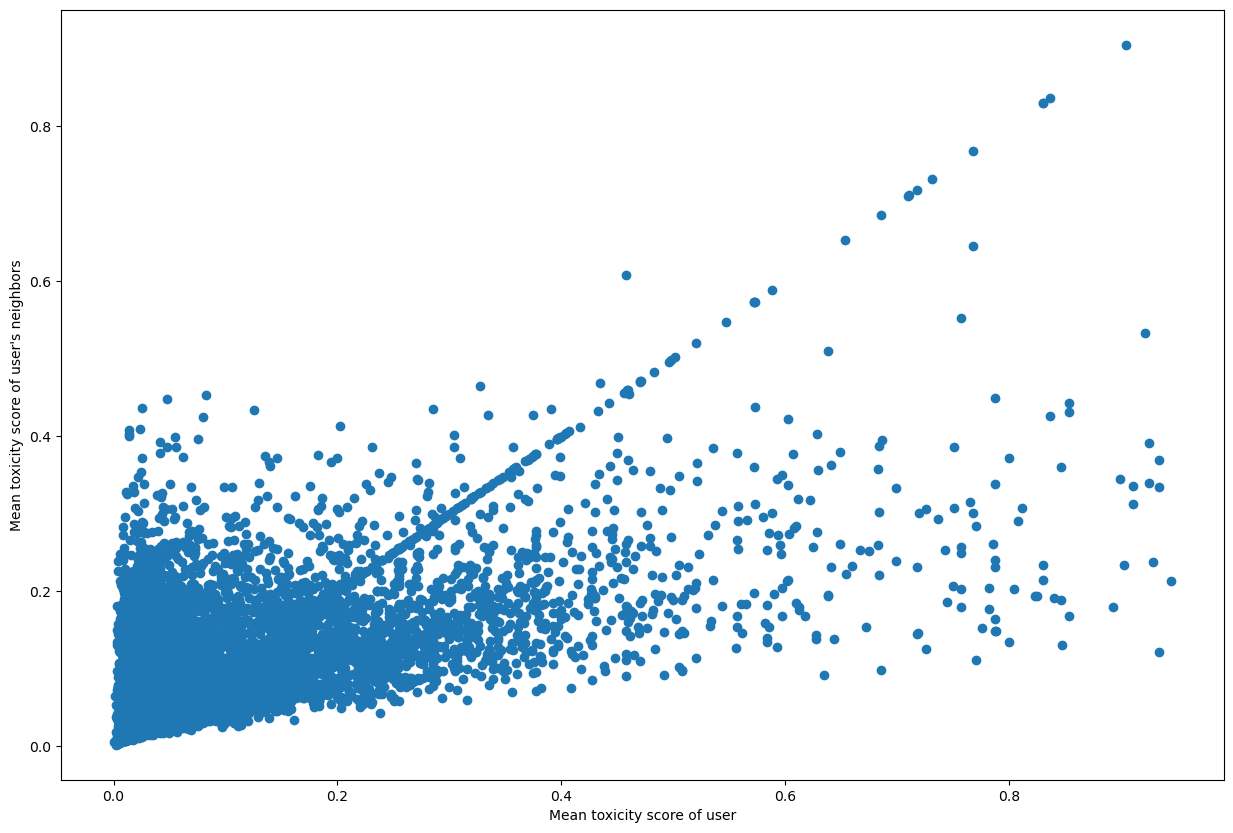

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(user_toxicity_means, neighbor_toxicity_means)
plt.xlabel('Mean toxicity score of user')
plt.ylabel('Mean toxicity score of user\'s neighbors')

# plt.xticks([i/10 for i in range(0, 11)])
# plt.yticks([i/10 for i in range(0, 11)])
plt.show()